In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive')

In [0]:
!pip install python-dotenv

In [0]:
import utils

In [0]:
import pandas as pd

features = utils.load('features.csv')
#tracks = utils.load('/content/drive/My Drive/tracks.csv')

In [0]:
import pandas as pd

tracks = pd.read_csv('tracks.csv')
tracks.columns = tracks.iloc[0]
tracks = tracks.drop([0, 1])
new_cols = tracks.columns.values
new_cols[0] = 'track_id'
tracks.columns = new_cols
tracks = tracks.reset_index(drop=True)
tracks.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,5,6,8,12,18,20,21,22,24,33,34,38,39,44,47,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,track_id,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page,split,subset,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:12,2008-11-26 00:00:00,168,2,Hip-Hop,[21],[21],NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
1,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,medium,256000,0,NaN,2008-11-26 01:48:14,2008-11-26 00:00:00,237,1,Hip-Hop,[21],[21],NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
2,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:20,2008-11-26 00:00:00,206,6,Hip-Hop,[21],[21],NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
3,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,[],Constant Hitmaker,2,Album,NaN,NaN,"Mexican Summer, Richie Records, Woodsist, Skul...","<p><span style=""font-family:Verdana, Geneva, A...",3,2008-11-26 01:42:55,74,6,NaN,NaN,NaN,"Kurt Vile, the Violators",Kurt Vile,NaN,"['philly', 'kurt vile']",http://kurtvile.com,NaN,training,small,192000,0,Kurt Vile,2008-11-25 17:49:06,2008-11-26 00:00:00,161,178,Pop,[10],[10],NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
4,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,[],Niris,13,Album,1990-01-01 00:00:00,2011-01-01 00:00:00,NaN,<p>Songs written by: Nicky Cook</p>\n<p>VOCALS...,2,2008-11-26 01:42:52,10,4,51.895927,Colchester England,0.891874,Nicky Cook\n,Nicky Cook,NaN,"['instrumentals', 'experimental pop', 'post pu...",NaN,NaN,training,large,256000,0,NaN,2008-11-26 01:48:56,2008-01-01 00:00:00,311,0,NaN,"[76, 103]","[17, 10, 76, 103]",NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


In [0]:
features = features.reset_index()
features.head()

feature    track_id chroma_cens            ...       zcr                    
statistics             kurtosis            ...       min      skew       std
number                       01        02  ...        01        01        01
0                 2    7.180653  5.230309  ...  0.000000  2.089872  0.061448
1                 3    1.888963  0.760539  ...  0.000000  1.716724  0.069330
2                 5    0.527563 -0.077654  ...  0.000000  2.193303  0.044861
3                10    3.702245 -0.291193  ...  0.000000  3.542325  0.040800
4                20   -0.193837 -0.198527  ...  0.000977  3.189831  0.030993

[5 rows x 519 columns]

In [0]:
#small = tracks['set', 'subset'] <= 'small'

#train = tracks['set', 'split'] == 'training'
#val = tracks['set', 'split'] == 'validation'
#test = tracks['set', 'split'] == 'test'
import numpy as np


tracks['subset'] = tracks['subset'].astype(str)
tracks['split'] = tracks['split'].astype(str)
tracks['genre_top'] = tracks['genre_top'].astype(str)

y_train = tracks.loc[(tracks['subset'] == 'small') & (tracks['split'] == 'training')]['genre_top']
y_val = tracks.loc[(tracks['subset'] == 'small') & (tracks['split'] == 'validation')]['genre_top']
y_test = tracks.loc[(tracks['subset'] == 'small') & (tracks['split'] == 'test')]['genre_top']
X_train = features.loc[(tracks['subset'] == 'small') & (tracks['split'] == 'training')]['mfcc']
X_test = features.loc[(tracks['subset'] == 'small') & (tracks['split'] == 'test')]['mfcc']
X_val = features.loc[(tracks['subset'] == 'small') & (tracks['split'] == 'validation')]['mfcc']

print('{} training examples, {} testing examples'.format(y_train.size, y_test.size))
print('{} features, {} classes'.format(X_train.shape[1], np.unique(y_train).size))

6400 training examples, 800 testing examples
140 features, 8 classes


In [0]:
np.unique(y_train)

array(['Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental',
       'International', 'Pop', 'Rock'], dtype=object)

In [0]:
np.unique(y_test)

array(['Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental',
       'International', 'Pop', 'Rock'], dtype=object)

In [0]:
import sklearn as skl
import sklearn.preprocessing

X_train, y_train = skl.utils.shuffle(X_train, y_train, random_state=42)
scaler = skl.preprocessing.StandardScaler(copy=False)
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

RF = RandomForestClassifier()
ran_for = RF.fit(X_train, y_train)
RF_score = ran_for.score(X_train, y_train)

print("Random Forest Score: " + str(RF_score))

Random Forest Score: 0.99984375


In [0]:
RF_test = ran_for.score(X_val, y_val)

print("Random Forest Score: " + str(RF_test))

Random Forest Score: 0.51


In [0]:
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)

In [0]:
import tensorflow as tf

y_train = tf.keras.utils.to_categorical(y_train, num_classes=8, dtype='int32')
y_val = tf.keras.utils.to_categorical(y_val, num_classes=8, dtype='int32')
y_test = tf.keras.utils.to_categorical(y_test, num_classes=8, dtype='int32')

In [0]:
X_train = np.array(X_train)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train[0]

array([-0.22523181, -0.45338181,  0.40686407, -0.12711467,  0.0832777 ,
       -0.36699721, -0.65456896, -0.53287677, -0.51443483, -0.49639243,
        0.17098347,  0.11411216,  0.66632894,  2.09214894,  1.34797479,
        0.11942389,  0.55360107,  0.71199253,  4.13663218,  4.05247313,
        0.91566051,  0.62597671, -0.55880746, -1.34135543, -1.39236275,
       -1.22332363, -1.02467837, -1.14237013, -1.25273333, -0.8270932 ,
        0.14612826,  0.08486021, -0.40468563,  1.47947377,  0.71684398,
        0.38072489,  0.61538206,  0.42030442,  2.24254944,  2.27898357,
        0.16417312,  0.08655967, -0.91328789, -0.81375718, -0.96409979,
       -0.67928352, -1.50988924, -0.9497647 , -1.68141807, -0.75189375,
       -1.68415119, -1.41285163, -1.45857316, -0.86698835, -0.66983148,
       -0.39352314, -0.77294708, -0.94773729, -0.62375284, -0.84089234,
        0.25098007,  0.02972327, -0.87928279, -0.65440687, -0.95088382,
       -0.66292798, -1.55742187, -0.95760126, -1.67684384, -0.75

In [0]:
len(X_train)

6400

In [0]:
from keras.models import load_model

model = load_model('best_model.hdf5')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 50)                7050      
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 408       
Total params: 10,008
Trainable params: 10,008
Non-trainable params: 0
_________________________________________________________________


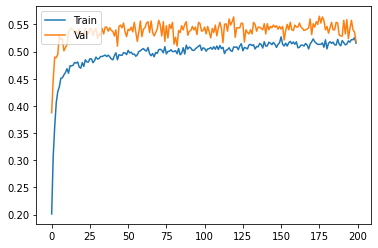

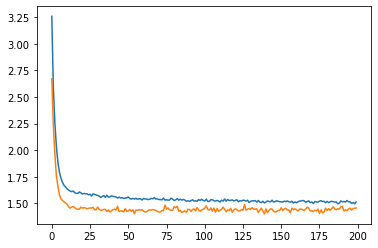

Train:
[1.3068895068764688, 0.5868750214576721]
Val:
[1.4038229298591614, 0.5649999976158142]


In [0]:
import keras
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

activation='relu'
weight_init='glorot_uniform'
optimizer=keras.optimizers.Adam(lr=0.001)
metrics=['accuracy']
epochs = 200
batch_size=None

model = keras.Sequential()
model.add(Dense(50, activation=activation, kernel_regularizer=keras.regularizers.l2(), kernel_initializer=weight_init, input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(50, activation=activation, kernel_regularizer=keras.regularizers.l2()))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))
model.compile(optimizer=optimizer, loss=keras.losses.CategoricalCrossentropy(), metrics=metrics)
mcp_save = ModelCheckpoint('best_model.hdf5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=0)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, verbose=0, callbacks=[mcp_save])
plt.plot(history.history['' + metrics[0]])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

best_model = load_model('best_model.hdf5')
print("Train:")
print(best_model.evaluate(X_train, y_train, verbose=2))
print("Val:")
print(best_model.evaluate(X_val, y_val, verbose=2))

In [0]:
from sklearn.metrics import classification_report
from keras.models import load_model

best_model = load_model('best_model.hdf5')
y_pred = best_model.predict(X_test)
y_pred = np.argmax(y_pred, 1)

y_pred = le.inverse_transform(y_pred)
y_true_test = np.argmax(y_test, 1)
y_true_test = le.inverse_transform(y_true_test)

print(classification_report(y_true_test, y_pred))

Using TensorFlow backend.


               precision    recall  f1-score   support

   Electronic       0.44      0.50      0.47       100
 Experimental       0.51      0.18      0.27       100
         Folk       0.24      0.24      0.24       100
      Hip-Hop       0.49      0.72      0.59       100
 Instrumental       0.46      0.56      0.51       100
International       0.54      0.49      0.51       100
          Pop       0.35      0.30      0.32       100
         Rock       0.56      0.62      0.59       100

     accuracy                           0.45       800
    macro avg       0.45      0.45      0.44       800
 weighted avg       0.45      0.45      0.44       800



Text(68.69999999999999, 0.5, 'predicted label')

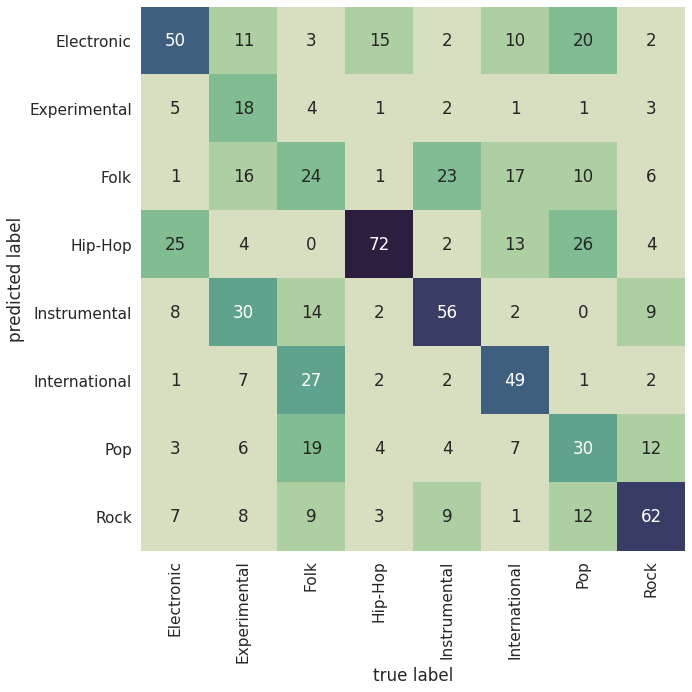

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_true_test, y_pred)
plt.figure(figsize=(10,10))

dict_genres = {'Electronic': 0, 'Experimental': 1, 'Folk': 2, 'Hip-Hop': 3, 'Instrumental': 4, 'International': 5, 'Pop': 6, 'Rock': 7}

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            cmap=sns.cubehelix_palette(8, start=.5, rot=-.75),
            xticklabels=dict_genres.keys(),
            yticklabels=dict_genres.keys())
plt.xlabel('true label')
plt.ylabel('predicted label')

In [0]:
X_crossval = np.concatenate((X_train, X_val), axis=0)
y_crossval = np.concatenate((y_train, y_val), axis=0)

In [0]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cvscores=[]

for i, (train_index, val_index) in enumerate(kf.split(X_crossval, y_crossval.argmax(1))):
    x_train_kf, x_val_kf = X_crossval[train_index], X_crossval[val_index]
    y_train_kf, y_val_kf = y_crossval[train_index], y_crossval[val_index]
    
    # create model
    activation='relu'
    weight_init='glorot_uniform'
    optimizer=keras.optimizers.Adam(lr=0.001)
    metrics=['accuracy']
    epochs = 200
    batch_size=None

    model = keras.Sequential()
    model.add(Dense(50, activation=activation, kernel_regularizer=keras.regularizers.l2(), kernel_initializer=weight_init, input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation=activation, kernel_regularizer=keras.regularizers.l2()))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='softmax'))
    model.compile(optimizer=optimizer, loss=keras.losses.CategoricalCrossentropy(), metrics=metrics)
    mcp_save = ModelCheckpoint('best_model_cv.hdf5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=0)
    history = model.fit(x_train_kf, y_train_kf, validation_data=(x_val_kf, y_val_kf), epochs=epochs, verbose=0, callbacks=[mcp_save])
    
    # evaluate the model
    model = load_model('best_model_cv.hdf5')
    scores = model.evaluate(x_val_kf, y_val_kf, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

KeyboardInterrupt: ignored

### On test set

In [0]:
model.evaluate(X_test, y_test, verbose=2)